In [1]:
import pandas as pd
import numpy as np
from keras.datasets import reuters
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
np.random.seed(121)
tf.random.set_seed(121)

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

train_data_df = pd.DataFrame(train_data)
train_labels_df = pd.DataFrame(train_labels)

reuters_df = pd.DataFrame(train_data_df)
reuters_df.columns=['train_data']
reuters_df['train_labels'] = train_labels_df


y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')


def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):

        results[i, sequence] = 1. 
    print()
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)


from keras.utils.np_utils import to_categorical
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

C:\Users\JG\anaconda3\envs\abangers\lib\site-packages\keras\datasets\reuters.py:143: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
C:\Users\JG\anaconda3\envs\abangers\lib\site-packages\keras\datasets\reuters.py:144: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


In [2]:
x_val = x_train[:1000].astype(float)
partial_x_train = x_train[1000:].astype(float)

y_val = y_train[:1000].astype(float)
partial_y_train = y_train[1000:].astype(float)

In [3]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(150, activation='ELU', input_shape=(10000,)))
model.add(layers.Dense(100, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='Nadam',
              loss='categorical_crossentropy',
              metrics=['categorical_accuracy'])


In [4]:

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=15,
                    batch_size=200,
                    validation_data=(x_val, y_val))
print("\n cate_Accuracy: %.4f" %(model.evaluate(x_val, y_val)[1]))

Epoch 1/15
40/40 [==============================] - 30s 94ms/step - loss: 2.6346 - categorical_accuracy: 0.4981 - val_loss: 1.1700 - val_categorical_accuracy: 0.7430
Epoch 2/15
40/40 [==============================] - 3s 67ms/step - loss: 0.8679 - categorical_accuracy: 0.8077 - val_loss: 0.9173 - val_categorical_accuracy: 0.8070
Epoch 3/15
40/40 [==============================] - 3s 70ms/step - loss: 0.4454 - categorical_accuracy: 0.9117 - val_loss: 0.8542 - val_categorical_accuracy: 0.8270
Epoch 4/15
40/40 [==============================] - 3s 68ms/step - loss: 0.2845 - categorical_accuracy: 0.9421 - val_loss: 0.8818 - val_categorical_accuracy: 0.8200
Epoch 5/15
40/40 [==============================] - 3s 72ms/step - loss: 0.1878 - categorical_accuracy: 0.9554 - val_loss: 0.8798 - val_categorical_accuracy: 0.8160
Epoch 6/15
40/40 [==============================] - 3s 72ms/step - loss: 0.1724 - categorical_accuracy: 0.9511 - val_loss: 0.9196 - val_categorical_accuracy: 0.8150
Epoch 7/1

In [5]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'categorical_accuracy', 'val_loss', 'val_categorical_accuracy'])

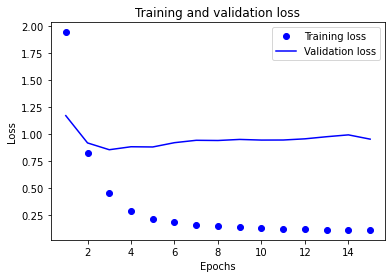

In [6]:
import matplotlib.pyplot as plt

acc = history.history['categorical_accuracy']
val_acc = history.history['val_categorical_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# ‘bo’는 파란색 점을 의미합니다
plt.plot(epochs, loss, 'bo', label='Training loss')
# ‘b’는 파란색 실선을 의미합니다
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

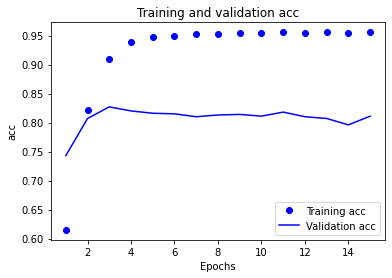

In [7]:
import matplotlib.pyplot as plt

acc = history.history['categorical_accuracy']
val_acc = history.history['val_categorical_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# ‘bo’는 파란색 점을 의미합니다
plt.plot(epochs, acc, 'bo', label='Training acc')
# ‘b’는 파란색 실선을 의미합니다
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation acc')
plt.xlabel('Epochs')
plt.ylabel('acc')
plt.legend()

plt.show()

In [8]:

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=7,
                    batch_size=200,
                    validation_data=(x_val, y_val))
print("\n cate_Accuracy: %.4f" %(model.evaluate(x_val, y_val)[1]))

Epoch 1/7
14/14 [==============================] - 2s 146ms/step - loss: 0.0799 - categorical_accuracy: 0.9655 - val_loss: 0.9723 - val_categorical_accuracy: 0.8100
Epoch 2/7
14/14 [==============================] - 2s 121ms/step - loss: 0.0722 - categorical_accuracy: 0.9627 - val_loss: 0.9815 - val_categorical_accuracy: 0.8120
Epoch 3/7
14/14 [==============================] - 2s 131ms/step - loss: 0.0692 - categorical_accuracy: 0.9619 - val_loss: 0.9857 - val_categorical_accuracy: 0.8110
Epoch 4/7
14/14 [==============================] - 2s 111ms/step - loss: 0.0682 - categorical_accuracy: 0.9615 - val_loss: 1.0120 - val_categorical_accuracy: 0.8030
Epoch 5/7
14/14 [==============================] - 2s 113ms/step - loss: 0.0675 - categorical_accuracy: 0.9614 - val_loss: 0.9912 - val_categorical_accuracy: 0.8110
Epoch 6/7
14/14 [==============================] - 2s 114ms/step - loss: 0.0681 - categorical_accuracy: 0.9590 - val_loss: 1.0143 - val_categorical_accuracy: 0.8150
Epoch 7/7
